In [1]:
import torch
import torch.nn as nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    transform=ToTensor(),
    target_transform=None,
    download=True
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    transform=ToTensor(),
    download=True
)

In [3]:
img, target = train_data[0]
img.shape

torch.Size([1, 28, 28])

In [4]:
img, target

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

shape of image torch.Size([1, 28, 28])


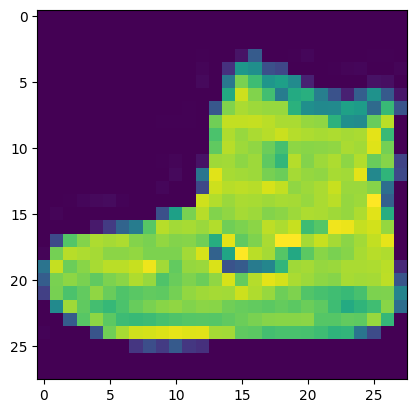

In [6]:
img, label = train_data[0]
print(f"shape of image {img.shape}")
plt.imshow(img.squeeze())
plt.show()

In [7]:
classes = train_data.classes

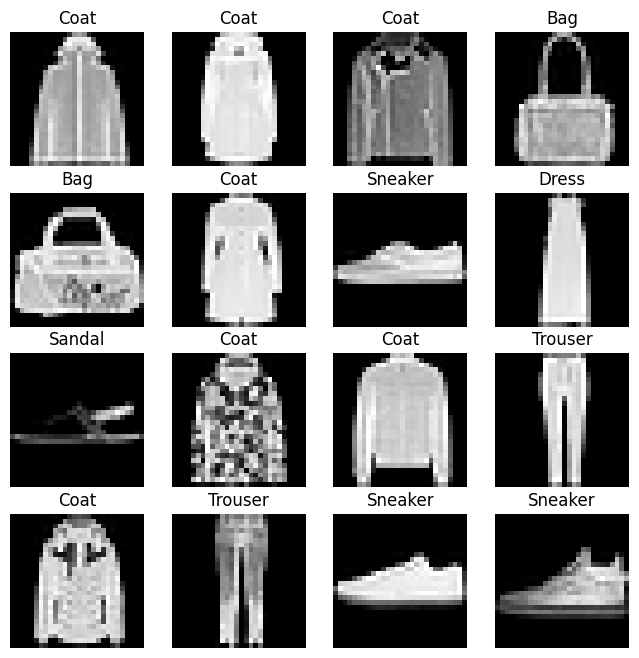

In [8]:
fig = plt.figure(figsize=(8,8))
row, col = 4, 4
for i in range(1, row*col + 1):
  random = torch.randint(0, len(train_data), size=[1]).item()
  img, target = train_data[random]
  fig.add_subplot(row, col, i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(classes[target])
  plt.axis(False)

In [9]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_loader = DataLoader(train_data,
    batch_size = BATCH_SIZE,
    shuffle=True
)

test_loader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [10]:
print("train_loader length: ", len(train_loader))
print("test_loader_length: ", len(test_loader))

train_loader length:  1875
test_loader_length:  313


(-0.5, 27.5, 27.5, -0.5)

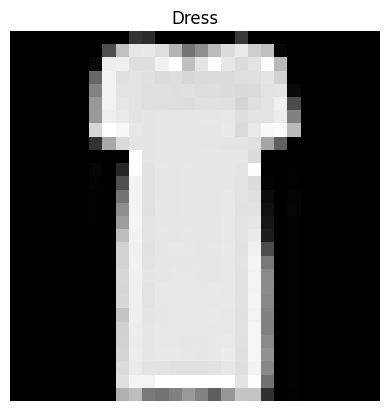

In [11]:
random = torch.randint(0, len(train_data), size=[1]).item()
img, target = train_data[random]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(classes[target])
plt.axis(False)

In [13]:
class FashionMnistM1(nn.Module):
  def __init__(self, input_features: int, hidden_units: int, output_features: int):
    super().__init__()
    self.layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features),
        nn.ReLU()
    )
  def forward(self, x: torch.Tensor):
    return self.layer(x)

In [14]:
torch.manual_seed(40)

model = FashionMnistM1(input_features=784,
                       hidden_units=10,
                       output_features=len(classes))
next(model.parameters())

Parameter containing:
tensor([[-0.0094,  0.0262, -0.0233,  ..., -0.0145, -0.0266,  0.0142],
        [-0.0142, -0.0174, -0.0015,  ..., -0.0303, -0.0272, -0.0166],
        [ 0.0274,  0.0215, -0.0289,  ..., -0.0346, -0.0327, -0.0243],
        ...,
        [-0.0250, -0.0212,  0.0088,  ..., -0.0190,  0.0004,  0.0168],
        [-0.0185, -0.0181,  0.0245,  ..., -0.0184,  0.0111, -0.0097],
        [ 0.0214,  0.0230,  0.0135,  ...,  0.0282,  0.0175,  0.0291]],
       requires_grad=True)

In [16]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [21]:
test_loader

In [23]:
from tqdm.auto import tqdm
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn):
  train_loss, train_acc = 0, 0
  for batch, (X, y) in enumerate(data_loader):
    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn):
  test_loss, test_acc = 0, 0

  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:
      test_pred = model(X)

      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
          y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
      )
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [24]:
torch.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

epochs = 10
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_loader,
        model=model,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_loader,
        model=model,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.25107 | Train accuracy: 58.84%
Test loss: 2.73162 | Test accuracy: 7.37%

Epoch: 1
---------
Train loss: 1.08571 | Train accuracy: 63.35%
Test loss: 3.11729 | Test accuracy: 6.25%

Epoch: 2
---------
Train loss: 0.91208 | Train accuracy: 66.61%
Test loss: 3.51160 | Test accuracy: 6.34%

Epoch: 3
---------
Train loss: 0.86774 | Train accuracy: 67.62%
Test loss: 3.75873 | Test accuracy: 5.50%

Epoch: 4
---------
Train loss: 0.85395 | Train accuracy: 67.80%
Test loss: 3.90859 | Test accuracy: 4.21%

Epoch: 5
---------
Train loss: 0.84290 | Train accuracy: 68.19%
Test loss: 4.12584 | Test accuracy: 5.32%

Epoch: 6
---------
Train loss: 0.81299 | Train accuracy: 69.53%
Test loss: 4.48520 | Test accuracy: 6.61%

Epoch: 7
---------
Train loss: 0.64803 | Train accuracy: 76.12%
Test loss: 4.37443 | Test accuracy: 8.15%

Epoch: 8
---------
Train loss: 0.63767 | Train accuracy: 76.53%
Test loss: 4.76993 | Test accuracy: 8.30%

Epoch: 9
---------
Train loss: 0.6309

let's experiment it with different hyperparameters and explore why test accuracy is this bad